(343, 287, 3)


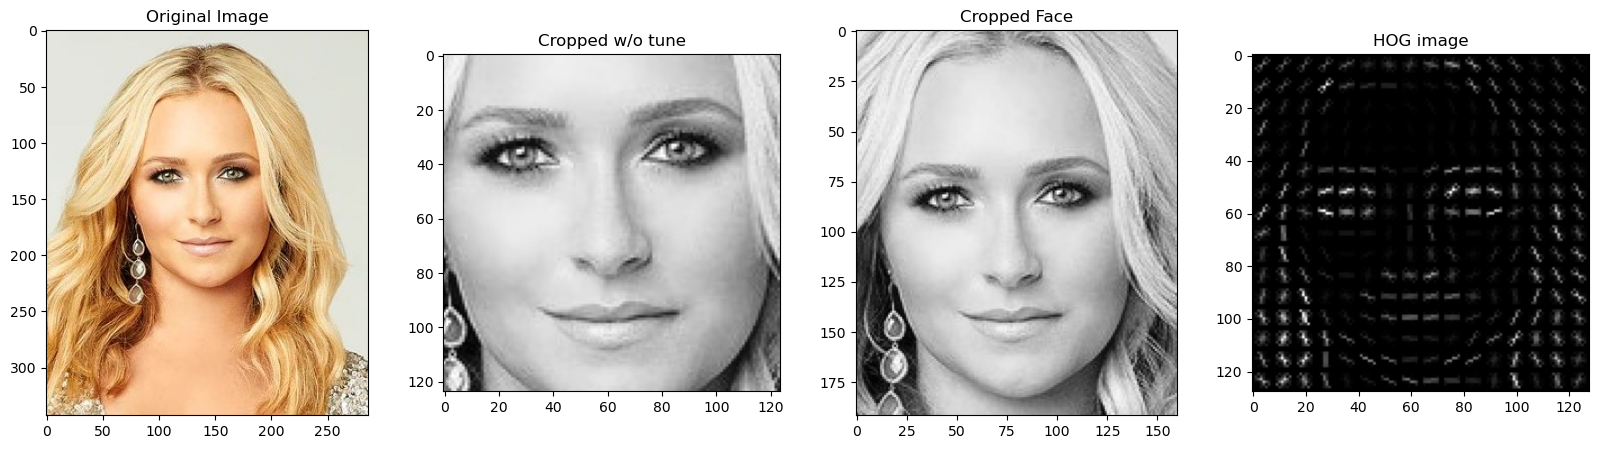

In [16]:
import cv2
import numpy as np
import dlib
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from skimage.feature import hog
from skimage import exposure

# Load dlib's pre-trained face detector
detector = dlib.get_frontal_face_detector()

def cropped_image(image, face, bot):
    # Increase the bounding box size
    left = max(0, int(face.left()*0.8))
    top = max(0, int(face.top()*0.5))
    right = min(image.shape[1], int(face.right()*1.1))
    bottom = min(image.shape[0], int(face.bottom()*1.1))
    
    # Crop the face
    cropped = image[top:bottom, left:right]
    return cropped

# Edge segmentation using Canny edge detection
def edge_segmentation(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

# Feature extraction (dummy example)


def extract_features(image):
    # Resize the image to 128x128
    image_resized = cv2.resize(image, (128, 128))
    # Compute HOG descriptors
    features, hog_image = hog(image_resized, orientations=8, pixels_per_cell=(8, 8),
                              cells_per_block=(4, 4), block_norm="L2", visualize=True)
    return features, hog_image

# Main process
def main(image_path): 
    # Load image
    image = cv2.imread(image_path)
    print(image.shape)
    # Step 1: Detect faces using dlib
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray_image)
    fig, ax = plt.subplots(1, 4, figsize=(20, 5))

    for face in faces:
        # Step 2: Convert to grayscale and crop the face
        # landmarks = predictor(gray_image, face)
        # for i in range(1, 17):
        #     cv2.line(image, (landmarks.part(i).x, landmarks.part(i).y), (landmarks.part(i-1).x, landmarks.part(i-1).y), (0, 255, 255), min(image.shape[0], image.shape[1])//100)

        left = max(0, int(face.left()))
        top = max(0, int(face.top()))
        right = min(image.shape[1], int(face.right()))
        bottom = min(image.shape[0], int(face.bottom()))

        # Crop the face
        cropped_wo_tune = image[top:bottom, left:right]
        cropped = cropped_image(image, face, None)
        gray_face = cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
        # gray_face = apply_kmeans(cropped)
        # Step 3: Edge segmentation and feature extraction
        # edges = edge_segmentation(gray_face)
        features, hog_image = extract_features(gray_face)
        
          # Rescale histogram for better display
        # Display results
        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[0].set_title('Original Image')
        ax[1].imshow(cv2.cvtColor(cropped_wo_tune, cv2.COLOR_BGR2GRAY), cmap='gray')
        ax[1].set_title('Cropped w/o tune')
        ax[2].imshow(gray_face, cmap='gray')
        ax[2].set_title('Cropped Face')
        ax[3].imshow(hog_image, cmap='gray')
        ax[3].set_title("HOG image")
        

# Run the main process
image_path = './sample/Heart/heart (14).jpg'
main(image_path)
